## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2020-11-30 16:22:41--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 2620:100:6025:1::a27d:4501, 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|2620:100:6025:1::a27d:4501|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/xvjzaxzz3ysphme/data_000637.txt [segue]
--2020-11-30 16:22:41--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Riutilizzo della connessione esistente a [www.dropbox.com]:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucfd3b9a322ed27bc18275e04463.dl.dropboxusercontent.com/cd/0/inline/BEIwErseT_g11Z_Hhzr1TK6El5sM7QRY8hn4VgAFwFkgjbP02jsIKe4hSDAf2UorYM1zYHBmNbeG9JxOPywPZCEfVyBeimJKwwyHIkwK7xiwK8HPRhvEt6cRsJvrSa5LPgA/file# [segue]
--2020-11-30 16:22:41--  https://ucfd3b9a322ed27bc18275e04463.dl.dropboxusercontent.com/cd/0/inline/BEIwErseT_g11Z_Hhzr1TK6El5sM7QRY8hn4VgAFwFkgjbP02jsIKe4hSDAf

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. 
#Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

N = 100000

data = pd.read_csv('/home/sabrina/data/data_000637.txt')   #see above where the file has been saved
df=pd.read_csv('/home/sabrina/data/data_000637.txt', nrows= N)
df


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
99995,1,0,64,3869201161,2378,29
99996,1,0,70,3869201161,2472,26
99997,1,0,58,3869201161,2558,0
99998,1,0,57,3869201161,2561,23


In [4]:
#2. Find out the number of BX in a ORBIT (the value 'x').


#reach max value then it starts counting again 
print("The number of BX in a ORBIT is:",df['BX_COUNTER'].max()+1)




The number of BX in a ORBIT is: 3564


In [5]:
#3. Find out how much the data taking lasted. You can either make an estimate based on the fraction 
#of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

init = data.loc[0, ['ORBIT_CNT','BX_COUNTER','TDC_MEAS']]
end = data.loc[len(data)-1, ['ORBIT_CNT','BX_COUNTER','TDC_MEAS']]

init_ns=init[0]*3564*25+init[1]*25+init[2]*(25/30)
end_ns=end[0]*3564*25+end[1]*25+end[2]*(25/30)

#print(init)
#print(fin)
#print("\n")

#print(init_ns)
#print(end_ns)

print("The data taking lasted: ", end_ns-init_ns, "ns")
print("The data taking lasted: ", (end_ns-init_ns)*(1e-9), "sec")




The data taking lasted:  980416093.3125 ns
The data taking lasted:  0.9804160933125 sec


In [6]:
#4. Create a new column with the absolute time in ns
#(as a combination of the other three columns with timing information).


abs_time= data['ORBIT_CNT']*3564*25+data['BX_COUNTER']*25+data['TDC_MEAS']*(25/30)  
data['ABS_TIME']=abs_time-abs_time[0] #absolute time column
data


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-01
2,1,0,63,3869200167,2553,28,4.476625e+03
3,1,0,64,3869200167,2558,19,4.594125e+03
4,1,0,64,3869200167,2760,25,9.649125e+03
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804161e+08
1310716,1,1,4,3869211171,763,11,9.804161e+08
1310717,1,0,64,3869211171,764,0,9.804161e+08
1310718,1,0,139,3869211171,769,0,9.804163e+08


In [7]:
#5. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

df_random01=df.copy()
df_random01.loc[df_random01['HEAD'] == 1,'HEAD'] = df_random01['HEAD'].apply(lambda x: np.random.randint(0,2))
df_random01




,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,0,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
99995,0,0,64,3869201161,2378,29
99996,0,0,70,3869201161,2472,26
99997,0,0,58,3869201161,2558,0
99998,1,0,57,3869201161,2561,23


In [8]:
#6. Create a new DataFrame that contains only the rows with HEAD=1.

df_head1=df_random01.copy()
df_head1 = df_random01.loc[df_random01['HEAD'] == 1]
df_head1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
...,...,...,...,...,...,...
99991,1,1,47,3869201161,2298,7
99993,1,1,106,3869201161,2304,16
99994,1,0,63,3869201161,2376,25
99998,1,0,57,3869201161,2561,23


TDC_CHANNEL
1        91
2       109
3       118
4       148
5       121
       ... 
124    1312
130       2
137       2
138       2
139    5831
Name: HEAD, Length: 121, dtype: int64


TDC_CHANNEL
1      2116
2      2444
3      1670
4      2014
5      1151
       ... 
129       2
130       4
137       2
138       2
139    2489
Name: HEAD, Length: 132, dtype: int64


Text(0.5, 1.0, 'FPGA 1')

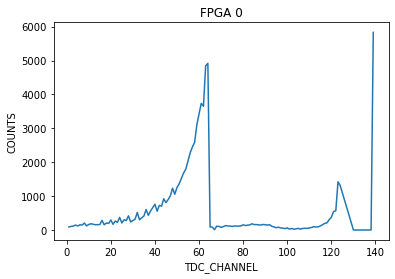

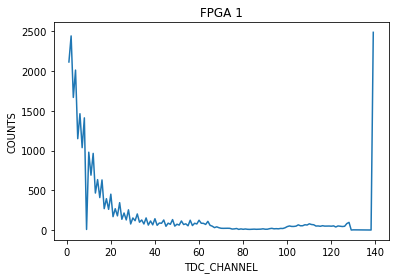

In [9]:
#7. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel
import matplotlib.pyplot as plt

#FPGA 0
df_0 = df[df["FPGA"] == 0]

numTDC = df_0.groupby(['TDC_CHANNEL']).sum()
print(numTDC['HEAD'])

numTDC['HEAD'].plot()
plt.ylabel('COUNTS')
plt.title('FPGA 0')

print("\n")

#FPGA 1
df_1=  df[df["FPGA"] == 1]
numTDC1= df_1.groupby(['TDC_CHANNEL']).sum()
print(numTDC1['HEAD'])

plt.figure()
numTDC1['HEAD'].plot()
plt.ylabel('COUNTS')
plt.title('FPGA 1')

#print(df_0)
#print(df_1)




In [10]:
#8. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

noise = df.groupby(['TDC_CHANNEL']).sum()
noise['HEAD'].nlargest(3)


TDC_CHANNEL
139    8320
64     5027
63     4917
Name: HEAD, dtype: int64

In [11]:
#9. Count the number of unique orbits. Count the number of unique orbits with at least one measurement 
#from TDC_CHANNEL=139


orbit= df.groupby(['ORBIT_CNT']).max()
print(orbit)
print("\n")
print("The number of unique orbits: ", len(orbit))
print("\n")

num=orbit.groupby(['TDC_CHANNEL']).count() #count() wtrite what it does
print(num)
print("\n")

print("The number of unique orbits with at least one measurament from TDC_CHANNEL=139 is:", num.iat[1,0])



            HEAD  FPGA  TDC_CHANNEL  BX_COUNTER  TDC_MEAS
ORBIT_CNT                                                
3869200167     1     1          139        3187        28
3869200168     1     1          139        3538        29
3869200169     1     1          139        2766        29
3869200170     1     1          139        3377        29
3869200171     1     1          139        3542        29
...          ...   ...          ...         ...       ...
3869201157     1     1          139        3521        29
3869201158     1     1          139        3509        29
3869201159     1     1          139        2659        29
3869201160     1     1          139        3555        29
3869201161     1     1          139        2565        29

[995 rows x 5 columns]


The number of unique orbits:  995


             HEAD  FPGA  BX_COUNTER  TDC_MEAS
TDC_CHANNEL                                  
100             1     1           1         1
139           994   994         994       994
